# Task 1: Lounge Utilization Analysis

## 1. Objective
The British Airways Lounge Manager requires a data-driven approach to estimate lounge usage. Currently, there is no systematic way to predict how busy the lounge will be based on the daily flight schedule.

**Goal:** Build a probabilistic "Lookup Table" that estimates the percentage of eligible passengers (Tier 1, 2, 3) for any given flight based on its destination region.

## 2. Methodology
1. **Load Data:** Import the historical summer flight schedule.
2. **Feature Engineering:** Calculate total seat capacity and passenger eligibility percentages.
3. **Aggregation:** Group flights by `ARRIVAL_REGION` to find average eligibility rates.
4. **Visualization:** Plot the distribution of status passengers to identify trends.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for professional plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Load the dataset
try:
    df = pd.read_csv('../data/raw/british_airways_schedule_summer.csv')
    print("Data successfully loaded.")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
except FileNotFoundError:
    print("Error: File not found. Please check the path and filename in 'data/raw/'.")

# Display the first few rows
df.head()

✅ Data successfully loaded.
Rows: 10000, Columns: 17


,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
0,9/2/25,14:19,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38
1,6/10/25,6:42,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28
2,10/27/25,15:33,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40
3,6/15/25,18:29,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54
4,8/25/25,20:35,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27


In [ ]:
# 1. Calculate Total Seat Capacity per flight
df['total_seats'] = df['FIRST_CLASS_SEATS'] + df['BUSINESS_CLASS_SEATS'] + df['ECONOMY_SEATS']

# 2. Calculate the percentage of eligible passengers for each Tier
df['tier1_pct'] = (df['TIER1_ELIGIBLE_PAX'] / df['total_seats']) * 100
df['tier2_pct'] = (df['TIER2_ELIGIBLE_PAX'] / df['total_seats']) * 100
df['tier3_pct'] = (df['TIER3_ELIGIBLE_PAX'] / df['total_seats']) * 100

print("Features created: 'total_seats', 'tier1_pct', 'tier2_pct', 'tier3_pct'")


✅ Features created: 'total_seats', 'tier1_pct', 'tier2_pct', 'tier3_pct'


In [6]:
# Group by 'ARRIVAL_REGION' and calculate the mean percentages
lookup_table = df.groupby('ARRIVAL_REGION').agg({
    'tier1_pct': 'mean',
    'tier2_pct': 'mean',
    'tier3_pct': 'mean',
    'ARRIVAL_COUNTRY': lambda x: ', '.join(x.unique()[:3]) # Capture top 3 example destinations
}).reset_index()

# Round to 2 decimal places for readability
lookup_table = lookup_table.round(2)

# Rename columns for the final report
lookup_table.columns = ['Region', 'Tier 1 %', 'Tier 2 %', 'Tier 3 %', 'Example Destinations']

print("Lounge Eligibility Lookup Table:")
display(lookup_table)

Lounge Eligibility Lookup Table:


,Region,Tier 1 %,Tier 2 %,Tier 3 %,Example Destinations
0,Asia,0.21,2.86,10.98,Japan
1,Europe,0.34,4.40,16.85,"Germany, Turkey, Austria"
2,Middle East,0.22,2.85,10.90,UAE
3,North America,0.22,2.95,11.23,USA


/Users/julian/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/julian/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/julian/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


 Chart saved to 'outputs/lounge_eligibility_chart.png'


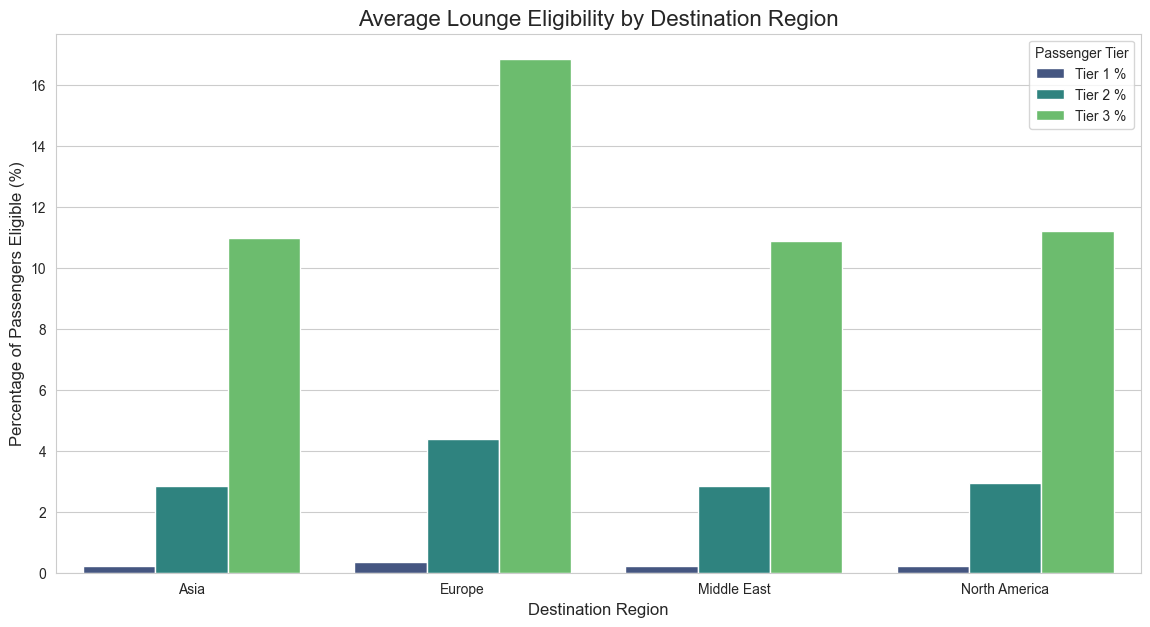

In [7]:
# Prepare data for plotting (Melting the dataframe)
plot_data = lookup_table.melt(id_vars=['Region'], 
                              value_vars=['Tier 1 %', 'Tier 2 %', 'Tier 3 %'],
                              var_name='Tier Status', value_name='Percentage')

# Create a Grouped Bar Chart
plt.figure(figsize=(14, 7))
chart = sns.barplot(data=plot_data, x='Region', y='Percentage', hue='Tier Status', palette='viridis')

# Add labels and title
plt.title('Average Lounge Eligibility by Destination Region', fontsize=16)
plt.ylabel('Percentage of Passengers Eligible (%)', fontsize=12)
plt.xlabel('Destination Region', fontsize=12)
plt.legend(title='Passenger Tier')

# Save the chart to the outputs folder
plt.savefig('../outputs/lounge_eligibility_chart.png', dpi=300, bbox_inches='tight')
print(" Chart saved to 'outputs/lounge_eligibility_chart.png'")

plt.show()

In [8]:
# Save the lookup table to CSV
lookup_table.to_csv('../outputs/lounge_lookup_table.csv', index=False)
print("Lookup table saved to 'outputs/lounge_lookup_table.csv'")

Lookup table saved to 'outputs/lounge_lookup_table.csv'
